In [1]:
#Instalação da Biblioteca do Yahoo Finances
#pip install yfinance --upgrade --no-cache-dir

# Dica: Ao utilizar o Google Colab use da sequinte forma:
# !pip install yfinance --upgrade --no-cache-dir

     ---------------------------------------- 59.2/59.2 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 499.4/499.4 kB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 3.8/3.8 MB 17.2 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1

[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas-datareader

     -------------------------------------- 109.5/109.5 kB 3.2 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
#Pacotes para análise de dados

import pandas as pd
import pandas_datareader.data as web
import numpy as np

#Análises de gráficos

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

#Função para data
from datetime import datetime

#Informações de finanças

import yfinance as yf
yf.pdr_override()

import warnings
warnings.filterwarnings('ignore')


In [2]:
# carrega os dados de ação da Petrobras de um ano
dados = web.get_data_yahoo('PETR4.SA', period='1y') 

dados.shape

[*********************100%***********************]  1 of 1 completed


(250, 6)

In [3]:
dados.head() 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-23,34.180000,34.599998,33.799999,34.220001,19.998299,86530100
2022-02-24,34.799999,35.290001,32.680000,33.389999,19.513243,139674100
2022-02-25,33.450001,34.000000,32.900002,34.000000,19.869726,86189100
2022-03-02,35.259998,35.290001,34.389999,34.669998,20.261278,58071800
2022-03-03,34.820000,34.930000,34.160000,34.240002,20.009987,69237400


In [4]:
# Exibe os últimos registros
dados.tail() 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-15,26.58,26.799999,26.299999,26.740000,26.740000,72554100
2023-02-16,26.60,26.950001,26.490000,26.850000,26.850000,44115700
2023-02-17,26.67,26.670000,26.370001,26.440001,26.440001,61085700
2023-02-22,26.00,26.110001,25.690001,25.760000,25.760000,38608500
2023-02-23,0.00,0.000000,0.000000,26.549999,26.549999,0


In [5]:
# Estatistica Descritiva: std (desvio padrao)
dados.describe() 

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,29.624800,30.153560,29.089080,29.742920,23.628774,8.149636e+07
std,4.117392,4.155339,4.056877,3.651788,3.494283,3.749338e+07
min,0.000000,0.000000,0.000000,21.469999,17.537958,0.000000e+00
25%,26.585000,27.082500,26.122500,26.705000,20.327597,5.607485e+07
50%,30.435000,30.785000,29.835000,30.180000,23.747416,7.266990e+07
75%,32.622500,33.119999,32.055001,32.567500,26.238671,9.660060e+07
max,37.650002,38.389999,36.849998,37.720001,33.003029,3.195016e+08


In [6]:
dados.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-02-23 to 2023-02-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [7]:
# Média móvel ajuda a entender algumas tendências.
# Conseguimos identificar o equilíbrio dos preços no mercado, observando tendências de alta, neutra ou baixa.
# MMA = soma dos preços de fechamento / número de dias

# Média simples

lista = [11, 12, 13, 14, 15, 16, 17]

from statistics import mean as media
print(f'Média: {media(lista)}')

Média: 14


In [8]:
# Período da média móvel

n = 5

for intervalo in range(3):
  print(f'Dia {intervalo}: {sum(lista[intervalo:n]) / 5}')

Dia 0: 13.0
Dia 1: 10.8
Dia 2: 8.4


Text(0.5, 1.0, 'Preço de fechamento')

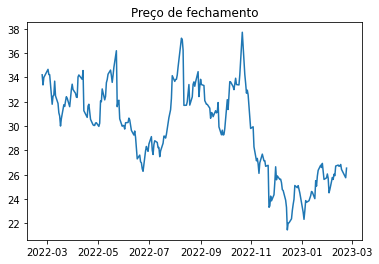

In [9]:
#Plot

plt.plot(dados['Close']) # preco de fechamento das acoes
plt.title('Preço de fechamento')

In [10]:
# Função rolling
from pandas.core import window

periodo = 5
dados['Close'].rolling(window = periodo).mean()

Date
2022-02-23       NaN
2022-02-24       NaN
2022-02-25       NaN
2022-03-02       NaN
2022-03-03    34.104
               ...  
2023-02-15    26.578
2023-02-16    26.762
2023-02-17    26.706
2023-02-22    26.498
2023-02-23    26.468
Name: Close, Length: 250, dtype: float64

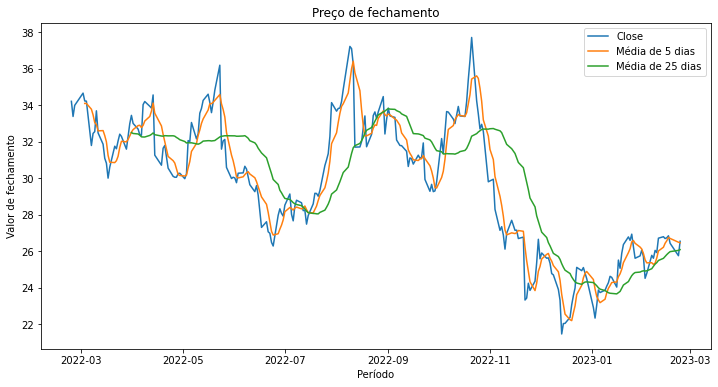

In [11]:
plt.figure(figsize = (12,6))
plt.plot(dados['Close']) 
plt.plot(dados['Close'].rolling(window = periodo).mean())
plt.plot(dados['Close'].rolling(window = periodo + 20).mean())
plt.title('Preço de fechamento');
plt.legend(['Close', 'Média de 5 dias', 'Média de 25 dias'])
plt.ylabel('Valor de fechamento')
plt.xlabel('Período');

In [12]:
# Plotly 

In [13]:
periodo = 5
dados['Média_Movel'] = dados['Close'].rolling(window = periodo).mean()

dados.head()

#Mais rápido e simples
figura = px.line(
    dados,
    y = 'Close',
    title = 'Fechamento'
)

figura.show()

In [14]:
#Conseguimos customizar bastante

figura_02 = go.Figure(
    data = go.Scatter(
        x = dados.index,
        y = dados['Close'],
        line = (dict(color = 'firebrick', width = 3))
    )
)

figura_02.update_layout(
    title='Análise de fechamento',
    xaxis_title = 'Período',
    yaxis_title = 'Fechamento'
)

figura_02.show()

In [15]:
#Gráfico de cotação

grafico_candlestick = go.Figure(
    data = [
        go.Candlestick(
            x = dados.index,
            open = dados['Open'],
            high = dados['High'],
            low = dados['Low'],
            close = dados['Close'],
            increasing_line_color = 'cyan',
            decreasing_line_color = 'gray'
        )
    ]
)

grafico_candlestick.update_layout(
    xaxis_rangeslider_visible = False,
    title = 'Análise de fechamento',
    xaxis_title = 'Período',
    yaxis_title = 'Preço de fechamento'
)
grafico_candlestick.show()

# Criando relatório

In [16]:
figurafinal = make_subplots(
    rows = 2,
    cols = 1,
    specs = [
        [{'type': 'scatter'}],
        [{'type': 'scatter'}]
    ],
    vertical_spacing = 0.075,
    shared_xaxes = True,
    subplot_titles = ('Cotação', 'Fechamento')
)

# Layout e dimensão
figurafinal.update_layout(
    width = 1000, #400 para formato mobile
    height = 800, 
    title_text = '<b>Advanced Analytics</b> <br> Follow-up Petrobrás'
)

# Adicionando gráfico na 1º posição
figurafinal.add_trace(
          go.Candlestick(
          x = dados.index,
          open = dados['Open'],
          high = dados['High'],
          low = dados['Low'],
          close = dados['Close'],
          increasing_line_color = 'red',
          decreasing_line_color = 'green'
      ),
      row = 1, col = 1
)

figurafinal.update_layout(
    xaxis_rangeslider_visible = False
)

#Adicionando um gráfico na segunda posição

figurafinal.add_trace(
    go.Scatter(
        x = dados.index,
        y = dados['Close'],
        mode = 'lines',
        name = 'Fechamento',
        line = dict(color = 'green')
    ),
    row = 2, col = 1
)

figurafinal.add_trace(
    go.Scatter(
        x = dados.index,
        y = dados['Média_Movel'],
        mode = 'lines',
        name = 'Média Movel',
        line = dict(color = 'red')
    ),
    row = 2, col = 1
)

figurafinal.update_layout(
  legend = dict(
      orientation = 'h',
      yanchor = 'bottom',
      y = 1.02,
      xanchor = 'right',
      x = 1,
      font = dict(size = 10)
  )    
)

figurafinal.add_annotation(
    showarrow = False,
    text = 'Análise feita no evento de Python',
    font = dict(size = 14),
    xref = 'x domain',
    x = 1,
    yref = 'y domain',
    y = -1.4
)

figurafinal.add_annotation(
    showarrow = False,
    text = 'Feito por Cinthia Yumi',
    font = dict(size = 14),
    xref = 'x domain',
    x = 0,
    yref = 'y domain',
    y = -1.4
)

figurafinal.show()

In [17]:
pip install -U kaleido


[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
figurafinal.write_image('report_fin.pdf')